# Graded Project Machine Learning - Unsupervised Learning

## Domain:
○ E-commerce

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Business Context:
● Customer segmentation is one of the most important marketing tools at your
disposal, because it can help a business to better understand its target audience.
This is because it groups customers based on common characteristics.

● Segmentation can be based on the customer’s habits and lifestyle, in
particular, their buying habits. Different age groups, for example, tend to
spend their money in different ways, so brands need to be aware of who
exactly is buying their product.

● Segmentation also focuses more on the personality of the consumer,
including their opinions, interests, reviews, and rating. Breaking down a
large customer base into more manageable clusters, making it easier to
identify your target audience and launch campaigns and promote the
business to the most relevant people

## Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)
Attribute Information:
SL.No Attribute Description
1. user_id a unique id for the customer
2. item_id unique product id
3. weight weight measurement of customer
4. rented for purpose clothing was rented for
5. body type body type of customer
6. review_text review given by the customer
7. size the standardized size of the product
8. rating rating for the product
9. age age of the customer
10. category the category of the product
11. bust size bust measurement of customer
12. height height of the customer
13. review_date date when the review was written
14. fit fit feedback


### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pandas.errors import EmptyDataError 

from datetime import datetime, date
from scipy.cluster.hierarchy import dendrogram, linkage



import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df=pd.read_csv("renttherunway.csv")
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
df.shape

(192544, 16)

In [4]:
df = df.sample(n=50000)

In [5]:
df.shape

(50000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 118710 to 177372
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50000 non-null  int64  
 1   fit             50000 non-null  object 
 2   user_id         50000 non-null  int64  
 3   bust size       45145 non-null  object 
 4   item_id         50000 non-null  int64  
 5   weight          42180 non-null  object 
 6   rating          49979 non-null  float64
 7   rented for      49999 non-null  object 
 8   review_text     49984 non-null  object 
 9   body type       46208 non-null  object 
 10  review_summary  49915 non-null  object 
 11  category        50000 non-null  object 
 12  height          49815 non-null  object 
 13  size            50000 non-null  int64  
 14  age             49774 non-null  float64
 15  review_date     50000 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 6.5+ MB


In [7]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,50000.000000,50000.000000,5.000000e+04,49979.000000,50000.00000,49774.000000
mean,96453.031520,501317.402880,1.047302e+06,9.094860,12.21846,33.848957
std,55470.282061,289247.540046,8.055133e+05,1.424963,8.45078,8.041052
min,6.000000,9.000000,1.233730e+05,2.000000,0.00000,0.000000
25%,48507.500000,251238.000000,1.968590e+05,8.000000,8.00000,29.000000
50%,96783.500000,501892.500000,9.518100e+05,10.000000,12.00000,32.000000
75%,144301.000000,754431.000000,1.679360e+06,10.000000,16.00000,37.000000
max,192542.000000,999971.000000,2.966087e+06,10.000000,58.00000,117.000000


### 3. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
df[df.duplicated()].count()

Unnamed: 0        0
fit               0
user_id           0
bust size         0
item_id           0
weight            0
rating            0
rented for        0
review_text       0
body type         0
review_summary    0
category          0
height            0
size              0
age               0
review_date       0
dtype: int64

### 5. Drop the columns which you think redundant for the analysis 

In [9]:
df.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [10]:
df.drop(columns = ['Unnamed: 0','user_id','item_id','review_text','review_summary'],inplace=True)

In [11]:
df.drop(columns = ['review_date'],inplace=True)

In [12]:
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
118710,fit,36b,140lbs,10.0,wedding,hourglass,gown,"5' 8""",16,39.0
68866,fit,32c,113lbs,8.0,formal affair,athletic,sheath,"5' 4""",1,21.0
141099,small,34d,150lbs,10.0,wedding,full bust,dress,"5' 4""",26,32.0
31752,fit,34c,125lbs,10.0,date,pear,top,"5' 4""",16,40.0
128194,fit,34d,135lbs,10.0,formal affair,athletic,dress,"5' 4""",4,27.0
...,...,...,...,...,...,...,...,...,...,...
16919,large,32b,112lbs,4.0,wedding,petite,dress,"5' 1""",1,29.0
99473,fit,32b,139lbs,10.0,formal affair,hourglass,gown,"5' 6""",12,45.0
160133,fit,34b,140lbs,10.0,wedding,pear,dress,"5' 4""",12,32.0
46793,large,34b,130lbs,8.0,wedding,athletic,dress,"5' 9""",4,27.0


### 6. Check the column 'weight', Is there any presence of string data? If yes, remove
the string data and convert to float. (Hint: 'weight' has the suffix as lbs) 

In [13]:
df['weight'] = df['weight'].str.replace('lb', '').str.replace('s', '').astype(float)

In [14]:
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
118710,fit,36b,140.0,10.0,wedding,hourglass,gown,"5' 8""",16,39.0
68866,fit,32c,113.0,8.0,formal affair,athletic,sheath,"5' 4""",1,21.0
141099,small,34d,150.0,10.0,wedding,full bust,dress,"5' 4""",26,32.0
31752,fit,34c,125.0,10.0,date,pear,top,"5' 4""",16,40.0
128194,fit,34d,135.0,10.0,formal affair,athletic,dress,"5' 4""",4,27.0
...,...,...,...,...,...,...,...,...,...,...
16919,large,32b,112.0,4.0,wedding,petite,dress,"5' 1""",1,29.0
99473,fit,32b,139.0,10.0,formal affair,hourglass,gown,"5' 6""",12,45.0
160133,fit,34b,140.0,10.0,wedding,pear,dress,"5' 4""",12,32.0
46793,large,34b,130.0,8.0,wedding,athletic,dress,"5' 9""",4,27.0


In [15]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

### 7. Check the unique categories for the column 'rented for' and group 'party:
         cocktail' category with 'party'.

In [16]:
df['rented for'].unique()
df['rented for'] = df['rented for'].replace(['party: cocktail'], "party")



In [17]:
df['rented for'].unique()

array(['wedding', 'formal affair', 'date', 'everyday', 'other', 'work',
       'vacation', 'party', nan], dtype=object)

### 8. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [18]:
df['height'] = df['height'].str.replace('"', '')

In [19]:
df['feet']=df.height.str.split("'").str[0].astype(np.float)
df['inc']=df.height.str.split("'").str[1].astype(np.float)

In [20]:
 df.loc[df['feet']<10,'feet']*=12

In [21]:
df['height']=df.feet+df.inc

In [22]:
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,feet,inc
118710,fit,36b,140.0,10.0,wedding,hourglass,gown,68.0,16,39.0,60.0,8.0
68866,fit,32c,113.0,8.0,formal affair,athletic,sheath,64.0,1,21.0,60.0,4.0
141099,small,34d,150.0,10.0,wedding,full bust,dress,64.0,26,32.0,60.0,4.0
31752,fit,34c,125.0,10.0,date,pear,top,64.0,16,40.0,60.0,4.0
128194,fit,34d,135.0,10.0,formal affair,athletic,dress,64.0,4,27.0,60.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16919,large,32b,112.0,4.0,wedding,petite,dress,61.0,1,29.0,60.0,1.0
99473,fit,32b,139.0,10.0,formal affair,hourglass,gown,66.0,12,45.0,60.0,6.0
160133,fit,34b,140.0,10.0,wedding,pear,dress,64.0,12,32.0,60.0,4.0
46793,large,34b,130.0,8.0,wedding,athletic,dress,69.0,4,27.0,60.0,9.0


In [23]:
df.drop(columns=['feet','inc'],inplace=True)

In [ ]:
df.shape

### 9. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [25]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [26]:
df['height'].fillna(0,inplace=True)

In [27]:
df['weight'].fillna(df['weight'].mean(),inplace=True)

In [28]:
df['rating'].fillna(df['rating'].mean(),inplace=True)

In [29]:
df['bust size'].fillna(0,inplace=True)

In [30]:
df['rented for'].fillna('other',inplace=True)

In [31]:
df['body type'].unique()

array(['hourglass', 'athletic', 'full bust', 'pear', nan, 'petite',
       'straight & narrow', 'apple'], dtype=object)

In [32]:
#label encoding 
cate=['body type','rented for']
le=LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(le.fit_transform)

In [33]:
df.isnull().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [34]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
118710,fit,36b,140.0,10.0,6,3,gown,68.0,16,39.0
68866,fit,32c,113.0,8.0,2,1,sheath,64.0,1,21.0
141099,small,34d,150.0,10.0,6,2,dress,64.0,26,32.0
31752,fit,34c,125.0,10.0,0,4,top,64.0,16,40.0
128194,fit,34d,135.0,10.0,2,1,dress,64.0,4,27.0


### 10. Check the statistical summary for the numerical and categorical columns and write your findings.'

In [35]:
df.describe()

,weight,rating,rented for,body type,height,size,age
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,137.225083,9.094860,3.939500,3.274760,65.060820,12.21846,33.848957
std,19.879426,1.424663,2.061399,1.902372,4.769811,8.45078,8.022858
min,50.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,125.000000,8.000000,2.000000,1.000000,63.000000,8.00000,29.000000
50%,137.225083,10.000000,4.000000,3.000000,65.000000,12.00000,32.000000
75%,145.000000,10.000000,6.000000,5.000000,67.000000,16.00000,37.000000
max,290.000000,10.000000,7.000000,7.000000,76.000000,58.00000,117.000000


### 11.  Are there outliers present in the column age? If yes, treat them with the appropriate method.

<AxesSubplot:xlabel='age'>

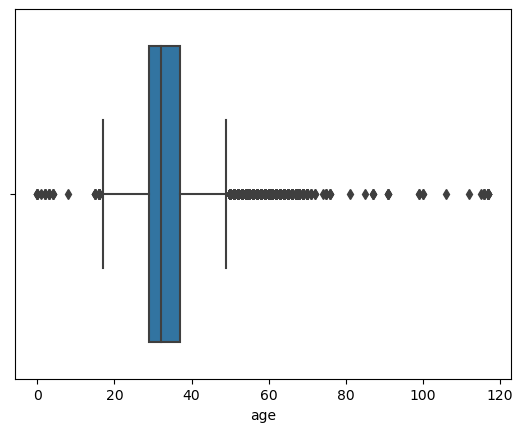

In [36]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

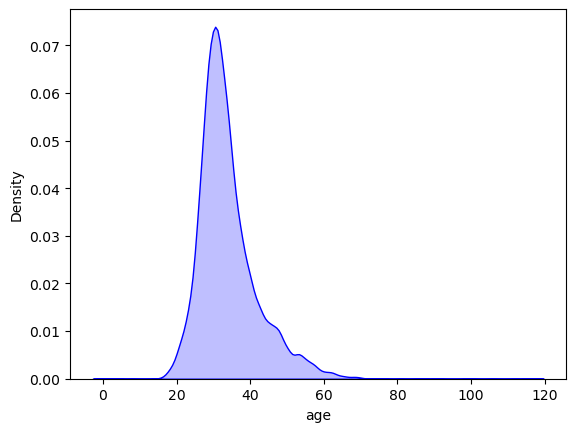

In [37]:
sns.kdeplot(df.age, color="blue", shade = True)

In [38]:
# Using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

29.0
37.0
8.0


In [39]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

17.0
49.0


In [40]:
df = df.loc[(df['age'] < upper_whisker) & (df['age'] > lower_whisker)] # rows without outliers
df.shape

(46981, 10)

<AxesSubplot:xlabel='age'>

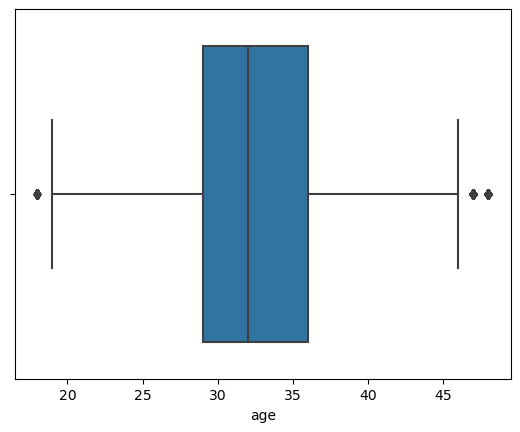

In [41]:
sns.boxplot(df['age'])

### 12. Check the distribution of the different categories in the column 'rented for' using appropriate plot. 

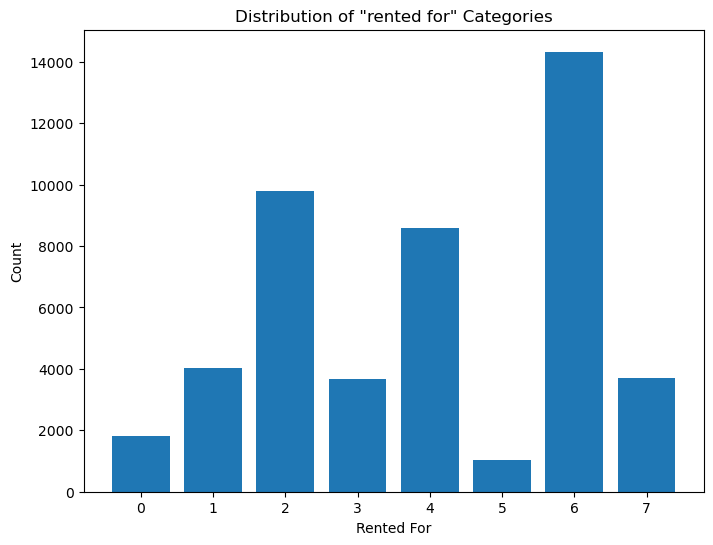

In [42]:
category_counts = df['rented for'].value_counts()

# Step 2: Create a bar chart to visualize the distribution
plt.figure(figsize=(8,6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Rented For')
plt.ylabel('Count')
plt.title('Distribution of "rented for" Categories')
plt.show()


In [43]:
# here we can see that most of the dresses are rented for "6" which is weddings and  least rented for "5" which is vacations.

### 13. Encode the categorical variables in the dataset

In [44]:
df['category'].unique()

array(['gown', 'sheath', 'dress', 'top', 'shift', 'mini', 'romper',
       'jumpsuit', 'skirt', 'pants', 'jacket', 'shirtdress', 'frock',
       'maxi', 'shirt', 'print', 'down', 'blouse', 'cape', 'blazer',
       'cardigan', 'legging', 'sweater', 'tank', 'coat', 'midi',
       'culottes', 'tunic', 'vest', 'sweatshirt', 'jogger', 'ballgown',
       'pant', 'skirts', 'bomber', 'suit', 'culotte', 'poncho',
       'trousers', 'trouser', 'leggings', 'turtleneck', 'tee', 'duster',
       'kimono', 'peacoat', 'hoodie', 'knit', 'pullover', 'kaftan',
       't-shirt', 'parka', 'trench', 'blouson', 'overcoat', 'cami',
       'henley', 'jeans', 'combo', 'sweatershirt', 'caftan', 'tight',
       'overalls', 'for'], dtype=object)

In [45]:
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
118710,fit,36b,140.000000,10.0,6,3,gown,68.0,16,39.0
68866,fit,32c,113.000000,8.0,2,1,sheath,64.0,1,21.0
141099,small,34d,150.000000,10.0,6,2,dress,64.0,26,32.0
31752,fit,34c,125.000000,10.0,0,4,top,64.0,16,40.0
128194,fit,34d,135.000000,10.0,2,1,dress,64.0,4,27.0
...,...,...,...,...,...,...,...,...,...,...
16919,large,32b,112.000000,4.0,6,5,dress,61.0,1,29.0
99473,fit,32b,139.000000,10.0,2,3,gown,66.0,12,45.0
160133,fit,34b,140.000000,10.0,6,4,dress,64.0,12,32.0
46793,large,34b,130.000000,8.0,6,1,dress,69.0,4,27.0


In [46]:
df = pd.get_dummies(df,columns=['fit'])

In [47]:
df.category.value_counts().sort_values(ascending=False).head(20)

dress         22762
gown          10867
sheath         4555
shift          1322
jumpsuit       1303
top            1146
maxi            876
romper          770
jacket          566
mini            462
skirt           363
sweater         255
coat            244
blazer          204
shirtdress      180
blouse          143
down            132
pants           102
shirt            67
vest             67
Name: category, dtype: int64

In [48]:
top_10=[x for x in df.category.value_counts().sort_values(ascending=False).head(10).index]
top_10

['dress',
 'gown',
 'sheath',
 'shift',
 'jumpsuit',
 'top',
 'maxi',
 'romper',
 'jacket',
 'mini']

In [49]:
for label in top_10:
    df[label]=np.where(df['category']==label,1,0)
df[['category']+top_10]

,category,dress,gown,sheath,shift,jumpsuit,top,maxi,romper,jacket,mini
118710,gown,0,1,0,0,0,0,0,0,0,0
68866,sheath,0,0,1,0,0,0,0,0,0,0
141099,dress,1,0,0,0,0,0,0,0,0,0
31752,top,0,0,0,0,0,1,0,0,0,0
128194,dress,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16919,dress,1,0,0,0,0,0,0,0,0,0
99473,gown,0,1,0,0,0,0,0,0,0,0
160133,dress,1,0,0,0,0,0,0,0,0,0
46793,dress,1,0,0,0,0,0,0,0,0,0


In [50]:
df.drop(columns=['category'],inplace=True)
df.head()

,bust size,weight,rating,rented for,body type,height,size,age,fit_fit,fit_large,...,dress,gown,sheath,shift,jumpsuit,top,maxi,romper,jacket,mini
118710,36b,140.0,10.0,6,3,68.0,16,39.0,1,0,...,0,1,0,0,0,0,0,0,0,0
68866,32c,113.0,8.0,2,1,64.0,1,21.0,1,0,...,0,0,1,0,0,0,0,0,0,0
141099,34d,150.0,10.0,6,2,64.0,26,32.0,0,0,...,1,0,0,0,0,0,0,0,0,0
31752,34c,125.0,10.0,0,4,64.0,16,40.0,1,0,...,0,0,0,0,0,1,0,0,0,0
128194,34d,135.0,10.0,2,1,64.0,4,27.0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
df['bust size'].value_counts().sort_values(ascending=False).head(20)

34b        6904
34c        5579
0          4542
34d        4536
36c        3148
32d        2765
36d        2676
32b        2661
32c        2533
36b        2212
34a        1973
32a        1306
38d         923
34dd        618
38c         584
36a         491
32dd        442
36dd        333
34d+        332
34ddd/e     258
Name: bust size, dtype: int64

In [52]:
top_10=[x for x in df['bust size'].value_counts().sort_values(ascending=False).head(10).index]
top_10

['34b', '34c', 0, '34d', '36c', '32d', '36d', '32b', '32c', '36b']

In [53]:
for label in top_10:
    df[label]=np.where(df['bust size']==label,1,0)
df[['bust size']+top_10]

,bust size,34b,34c,0,34d,36c,32d,36d,32b,32c,36b
118710,36b,0,0,0,0,0,0,0,0,0,1
68866,32c,0,0,0,0,0,0,0,0,1,0
141099,34d,0,0,0,1,0,0,0,0,0,0
31752,34c,0,1,0,0,0,0,0,0,0,0
128194,34d,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16919,32b,0,0,0,0,0,0,0,1,0,0
99473,32b,0,0,0,0,0,0,0,1,0,0
160133,34b,1,0,0,0,0,0,0,0,0,0
46793,34b,1,0,0,0,0,0,0,0,0,0


In [54]:
df.drop(columns=['bust size'],inplace=True)
df.head()

,weight,rating,rented for,body type,height,size,age,fit_fit,fit_large,fit_small,...,34b,34c,0,34d,36c,32d,36d,32b,32c,36b
118710,140.0,10.0,6,3,68.0,16,39.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
68866,113.0,8.0,2,1,64.0,1,21.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
141099,150.0,10.0,6,2,64.0,26,32.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
31752,125.0,10.0,0,4,64.0,16,40.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
128194,135.0,10.0,2,1,64.0,4,27.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0



### 14. Standardize the columns, so that values are in a particular range


In [55]:
ss=StandardScaler()
df1=df.copy()
scaled_features=ss.fit_transform(df1.values)
scaled_features_df=pd.DataFrame(scaled_features,index=df1.index,columns=df1.columns)

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [56]:
cov_matrix=np.cov(scaled_features.T)
cov_matrix

array([[ 1.00002129e+00, -2.50624877e-02,  1.04479840e-02,
        -1.97162384e-01,  1.91454074e-01,  7.25780953e-01,
         6.47224812e-02, -9.60393900e-03, -1.53048337e-04,
         1.26253621e-02,  8.98327795e-03,  2.32632475e-02,
         5.49794640e-03, -1.87439347e-03, -1.12831910e-02,
        -1.39901216e-02,  9.74768253e-03, -2.75293064e-02,
        -1.08645049e-02, -5.22543248e-02, -1.11738185e-01,
        -5.65541889e-02,  2.83264094e-02,  2.46453965e-02,
         1.53251280e-01, -1.33848007e-01,  1.92555993e-01,
        -1.87397464e-01, -1.59864099e-01,  1.04350091e-01],
       [-2.50624877e-02,  1.00002129e+00,  1.62575005e-02,
         2.24155111e-02, -1.65751743e-03, -3.98074966e-02,
        -4.84361888e-02,  2.47477992e-01, -1.46706708e-01,
        -1.75926447e-01, -2.73313472e-02,  6.61176667e-02,
         1.31413682e-02, -2.19714125e-02, -1.78882920e-03,
        -2.98849002e-02,  5.56599027e-03, -2.00245761e-02,
        -3.58894869e-03, -2.58490956e-02,  1.57942584e-

In [57]:
eig_vals,eig_vectors=np.linalg.eig(cov_matrix)
print('eigein Vals:','\n',eig_vals)
print('\n')
print("eigein vectors: ",'\n',eig_vectors)

eigein Vals: 
 [2.24534822e+00 2.00008538e+00 7.19391807e-02 2.09762132e-01
 2.62198825e-01 1.60707675e+00 5.11200049e-16 6.95648036e-01
 7.82593155e-01 1.27367831e+00 1.24077062e+00 8.34285388e-01
 8.55659427e-01 9.15482156e-01 1.17205965e+00 1.15926336e+00
 9.65864065e-01 1.13453293e+00 1.11302577e+00 9.96913507e-01
 1.09061575e+00 1.01379270e+00 1.01850402e+00 1.02253839e+00
 1.03261440e+00 1.03907178e+00 1.05448719e+00 1.06778416e+00
 1.06399962e+00 1.06104369e+00]


eigein vectors:  
 [[ 5.60848897e-01 -1.05714732e-01  3.63475755e-03  1.01431392e-01
  -6.90358392e-01  8.11734321e-03  1.61831073e-16  3.82341556e-01
  -3.48226763e-02  6.03509186e-02 -6.28142655e-02 -1.11492377e-02
   4.67725325e-02 -9.28912563e-02 -4.93666205e-02 -1.78522298e-02
   1.03331361e-01 -5.11653316e-02  2.62225025e-02  2.11721943e-02
  -3.11634992e-02  2.13106675e-02 -1.68135059e-02 -2.00255246e-02
   3.72642809e-02  9.97374557e-03 -1.68077339e-02  7.27761788e-03
  -1.20853552e-02 -1.09044059e-02]
 [-8.787

In [58]:
total=sum(eig_vals)
var_exp=[(i/total)*100 for i in sorted (eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Explained Variance : ",var_exp)
print('Cummulative Variance Explained :',cum_var_exp)

Explained Variance :  [7.484334744783283, 6.666809372963487, 5.356808490108142, 4.245503998957494, 4.13581402939633, 3.906782349832695, 3.8641289397484244, 3.7816959430739177, 3.7100069166137737, 3.635308455143254, 3.5592047595930274, 3.5465899139522734, 3.536737009092869, 3.5148824875531735, 3.4634988914126854, 3.441974739924669, 3.408388757532487, 3.39494114135914, 3.379237075400649, 3.3229742920147474, 3.219478354138415, 3.0515422340483065, 2.8521373799697853, 2.7808920992012705, 2.6085883247420534, 2.3187774291072794, 0.8739774811054507, 0.6991922243962594, 0.2397921648346661, 1.703963893742108e-15]
Cummulative Variance Explained : [  7.48433474  14.15114412  19.50795261  23.75345661  27.88927064
  31.79605299  35.66018193  39.44187787  43.15188479  46.78719324
  50.346398    53.89298791  57.42972492  60.94460741  64.4081063
  67.85008104  71.2584698   74.65341094  78.03264802  81.35562231
  84.57510066  87.6266429   90.47878028  93.25967238  95.8682607
  98.18703813  99.06101561  

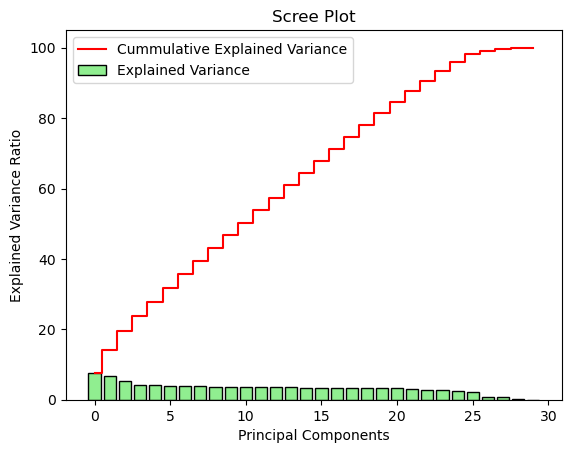

In [59]:
plt.bar(range(30),var_exp,align="center",color="lightgreen",edgecolor='black',label='Explained Variance')
plt.step(range(30),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [60]:
pca=PCA(n_components=25)

pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20","PC21","PC22","PC23","PC24","PC25"])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,1.056850,-1.648374,0.905634,-0.289274,-0.321399,-0.782962,-0.635753,0.322657,-1.110676,-0.594244,...,-1.281852,0.136218,0.294913,-0.021378,0.475379,1.357960,-0.288062,-0.930960,1.216444,-0.573932
1,-2.232921,-0.348794,0.924184,-0.103775,2.214601,0.684477,-0.314454,0.879049,-1.291571,-0.891062,...,-0.115906,0.452833,0.544086,0.036181,-0.303690,-1.448606,0.121251,1.964745,-1.338017,1.220474
2,2.131531,1.902520,-0.934085,0.062024,1.344201,0.110605,-1.090155,-2.191132,-0.982962,1.938025,...,0.458166,0.082317,-0.109779,-0.010248,-1.062644,0.093511,1.042061,-1.207143,0.310019,0.097672
3,-0.464845,-0.881978,1.361042,-1.487073,-0.780207,2.414665,0.758827,0.326648,3.215107,-0.103429,...,-2.172693,-1.178864,-4.166688,-0.587887,-1.559390,-0.110242,0.706782,-1.369307,0.117766,-0.367861
4,-0.429944,-0.623556,-1.068040,-1.488864,-0.038586,0.749940,-0.339588,-1.569755,-1.162508,2.094454,...,0.316938,0.060437,-0.009650,0.114323,-0.666436,-0.626565,0.885082,0.194841,-0.929335,0.377738


In [61]:
cluster_errors=[]
cluster_range=range(2,10)
for num_cluster in cluster_range:
    cluster=KMeans(num_cluster,random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

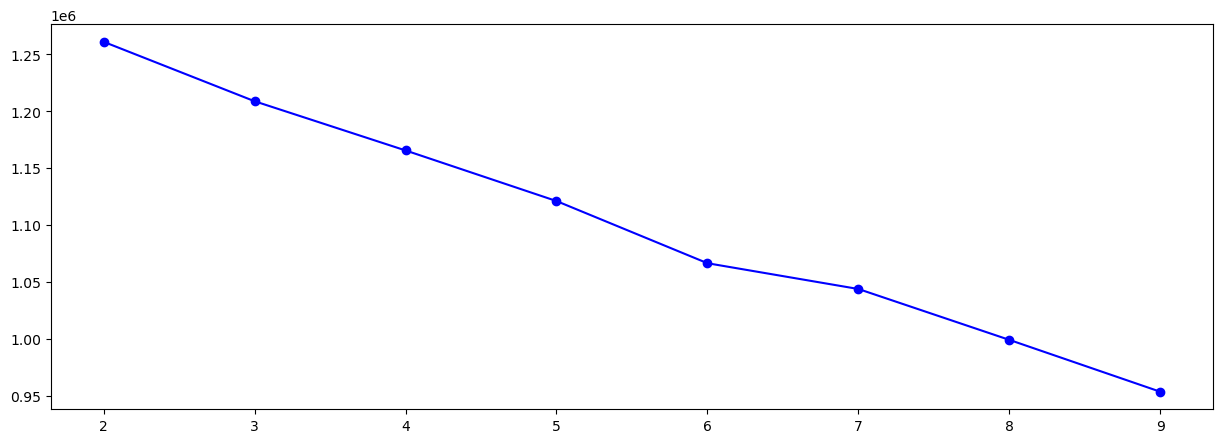

In [62]:
cluster_df=pd.DataFrame({'num_cluster':cluster_range,'cluster_errors':cluster_errors})

#Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_cluster'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [63]:
# Appliying KMeans clustering for the optimal number of clusters abtained above

kmeans=KMeans(n_clusters=5,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=5, random_state=100)

In [64]:
#creating a dataframe of the labels.

label=pd.DataFrame(kmeans.labels_,columns=['Label'])

In [65]:
# joining the label dataframe to the pca_df dataFrame.

kmeans_df=pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,Label
0,1.056850,-1.648374,0.905634,-0.289274,-0.321399,-0.782962,-0.635753,0.322657,-1.110676,-0.594244,...,0.136218,0.294913,-0.021378,0.475379,1.357960,-0.288062,-0.930960,1.216444,-0.573932,2
1,-2.232921,-0.348794,0.924184,-0.103775,2.214601,0.684477,-0.314454,0.879049,-1.291571,-0.891062,...,0.452833,0.544086,0.036181,-0.303690,-1.448606,0.121251,1.964745,-1.338017,1.220474,0
2,2.131531,1.902520,-0.934085,0.062024,1.344201,0.110605,-1.090155,-2.191132,-0.982962,1.938025,...,0.082317,-0.109779,-0.010248,-1.062644,0.093511,1.042061,-1.207143,0.310019,0.097672,1
3,-0.464845,-0.881978,1.361042,-1.487073,-0.780207,2.414665,0.758827,0.326648,3.215107,-0.103429,...,-1.178864,-4.166688,-0.587887,-1.559390,-0.110242,0.706782,-1.369307,0.117766,-0.367861,3
4,-0.429944,-0.623556,-1.068040,-1.488864,-0.038586,0.749940,-0.339588,-1.569755,-1.162508,2.094454,...,0.060437,-0.009650,0.114323,-0.666436,-0.626565,0.885082,0.194841,-0.929335,0.377738,3


In [66]:
kmeans_df['Label'].value_counts()

3    22386
1    10948
2     9881
0     2463
4     1303
Name: Label, dtype: int64

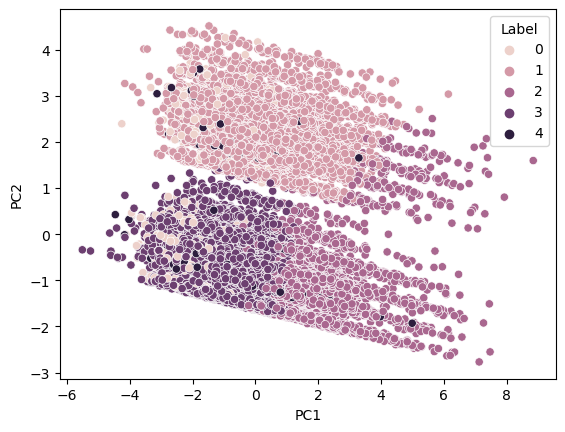

In [67]:
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [ ]:
plt.figure(figsize=[18,5])
merg=linkage(scaled_features,method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclideam distance')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
for i in range(2,15):
    hier=AgglomerativeClustering(n_clusters=i)
    hier=hier.fit(scaled_features_df)
    labels=hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

In [ ]:
hie_cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',
                                   linkage='ward')
hie_cluster_model=hie_cluster.fit(scaled_features_df)

In [ ]:
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['labels'])
df_label1.head(5)

In [ ]:
df_hier=df.join(df_label1)
df_hier.head()

### Visualization and Interpretation of results

In [ ]:
sns.barplot(df_hier['labels'],df_hier['body type'])
plt.show()

In [ ]:
sns.barplot(df_hier['labels'],df_hier['age'])
plt.show()

In [ ]:
sns.barplot(df_hier['labels'],df_hier['rented for '])
plt.show()

-----
## Happy Learning
-----